# Expansion of the Universe & Equations

* The expansion of the universe is a fundamental cosmological concept that describes the observed phenomenon of galaxies and other cosmic structures moving away from each other as time progresses. This concept is supported by various astronomical observations and is a central component of the Big Bang theory.

* The expansion of the universe is primarily described by Hubble's law. the farther a galaxy is from us, the faster it appears to be moving away:
  > $v = H_0 \cdot d$

  where:

  $H_0$: Hubble Constant ($H_0 = 73.3 km/s/Mpc$)

  $v$: velocity of recession of a distant object

  $d$: distance

* The Hubble constant is a measure of the current rate of expansion of the universe. It represents the slope of the linear relation in Hubble's law. Its value is a subject of ongoing research and debate, but it is typically expressed in units of kilometers per second per megaparsec (km/s/Mpc). To determine the Hubble parameter:
  > $H(t) = \frac{a^{'}}{a}$

  where:

  $a$: time-dependent scale factor

  $a^{'}$: its time derivative

  **The scale factor basically describes how the mean distance between galaxies changes due the expansion of the Universe, assuming a constant population of galaxies in a homogeneous and isotropic Universe. It is normalized to unity at present time. As we look back in cosmic history, the scale factor becomes smaller and smaller and vanishes at the Big Bang. For example, a scale factor $a=0.5$ at some earlier time indicates that galaxies were typically closer by a factor of two at that time.**

    - The expansion rate of the Universe is not constant. The time evolution of the scale factor is governed by the Friedmann equation. The Friedmann equations are a set of fundamental equations in cosmology that describe the evolution of the universe within the framework of general relativity:

    Friedmann's First Equation (Energy Conservation Equation):

    > $(\frac{\dot{a}}{a})^2 = (8\pi G/3)ρ - k/a^2 + Λ/3$

    Friedmann's Second Equation (Acceleration Equation):

    > $(\frac{¨a}{a}) = -(4\pi G/3)(ρ + 3('p)) + Λ/3$

    where:

    $G$: the gravitational constant

    $ρ$: the energy density of the universe, including both matter and energy components

    $k$: the curvature of space, which can be positive (closed universe), negative (open universe), or zero (flat universe)

    $Λ$: the cosmological constant, introduced by Albert Einstein as the cosmological constant term in his equations of general relativity

    $('p)$: the pressure of the cosmic fluid (matter and energy) in the universe

    - The time evolution of the scale factor is governed by the Friedmann equation:

      > $\dot{a} = H_0 \sqrt{\frac{\Omega_{M,0}}{a} + \frac{\Omega_{rad,0}}{a^2} + \Omega_{\Lambda,0}a^2 + 1 - \Omega_0}$

      where:

      $\dot{a}$: the time derivative of the scale factor, which describes how the scale factor changes over time, essentially the expansion rate

      $a$: the scale factor, which describes how the size of the Universe changes with time

      $H_0$: the Hubble constant, which gives the current expansion rate of the Universe

      $\Omega_{M,0}$, $\Omega_{rad,0}$, $\Omega_{\Lambda,0}$: the present-day density parameters for matter, radiation, and dark energy (cosmological constant), respectively

      $\Omega_0$: the sum of the density parameters and should equal 1 for a flat universe according to the cosmological principle

    - Measurements of the cosmic microwave background (CMB) by the Planck spacecraft imply, This is the foundation of the so-called ΛCDM(CDM is the abbreviation for cold dark matter):

    $\Omega_{M,0}$: 0.309

    $\Omega_{\Lambda,0}$: 0.691

    $H_0$: 67.7 km/s Mpc^-1


* One of the key pieces of evidence for the expansion is the observation of redshift in the light from distant galaxies. As galaxies move away from us, the light they emit is stretched (redshifted), causing a shift towards longer wavelengths.
  > $z = \frac{\Delta \lambda}{\lambda_0}$

  where:

  $z$: redshift parameter

  $\Delta \lambda$: change in wavelength

  $\lambda_0$: rest wavelength

* The temperature fluctuations in the Cosmic Microwave Background (CMB) radiation reveal a pattern of hot and cold spots, which can be explained by the expansion of the universe and the Big Bang.
* Large-scale surveys of galaxy redshifts show a systematic trend of galaxies moving away from us in all directions, consistent with an expanding universe.
* Certain astronomical objects, like Type Ia supernovae, serve as "standard candles" with known intrinsic luminosities. The observed brightness of these objects at different distances provides evidence for cosmic expansion.
* The bending of light by massive objects (gravitational lensing) can be used to indirectly measure the distribution of matter in the universe and confirm the expansion.



In [44]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import quad
import astropy.units as unit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("dark_background")
%matplotlib inline

In [2]:
def FriedmannEquation(scaleFactor:int or float,timeVariable:int or float,hubbleConstant:int or float,matterDensity:int or float,radiationDensity:int or float,darkEnergyDensity:int or float,curvatureDensity:int or float)->int or float:
  """
    Calculate the rate of change of the scale factor 'a' with respect to time 't' using the Friedmann equation.

    Parameters:
    scaleFactor, a (float): The scale factor of the Universe, a dimensionless measure of the Universe's expansion. It is normalized to 1 at the current time, with values less than 1 for past times and greater than 1 for future times.
    timeVariable, t (float): The cosmological time variable, representing the age of the Universe at the scale factor 'a'. It is typically expressed in gigayears (Gyr).
    hubbleConstant, H0 (float): The Hubble constant at the current time, representing the current rate of expansion of the Universe. The value is given in units of inverse gigayears (1/Gyr).
    matterDensity, Omega_m0 (float): The present-day matter density parameter, representing the fraction of the critical density of the Universe made up of matter, including baryonic and dark matter.
    radiationDensity, Omega_r0 (float): The present-day radiation density parameter, representing the fraction of the critical density of the Universe made up of radiation. This is often negligible in late-time cosmology.
    darkEnergyDensity, Omega_lambda0 (float): The present-day dark energy density parameter, representing the fraction of the critical density of the Universe made up of dark energy, which is hypothesized to drive the accelerated expansion.
    curvatureDensity, Omega_k0 (float): The present-day curvature density parameter, representing the spatial curvature's contribution to the overall energy density of the Universe. It is zero for a flat universe.

    Returns:
    adot (float): The rate of change of the scale factor 'a'.
  """
  adot = hubbleConstant*np.sqrt(matterDensity/scaleFactor+radiationDensity/scaleFactor**2+darkEnergyDensity*scaleFactor**2+curvatureDensity)
  return adot

In [3]:
# Constants based on Planck spacescraft
H0 = 67.4 # Hubble constant at z = 0 in km/s/Mpc
H0 = H0*1.0220122e-3  # Convert Hubble constant to 1/Gyr units, H0 in 1/Gyr
Omega_m0 = 0.309 # Matter density parameter at z = 0
Omega_lambda0 = 0.691 # Dark energy density parameter at z = 0
Omega_k0 = 1.0 - Omega_m0-Omega_lambda0 # Curvature density parameter at z = 0, assuming flat Universe
Omega_r0 = 0 # The radiation component is very small and is often neglected in late-time Universe calculations

In [4]:
a0 = 1.0 # Initial condition (scale factor at t=0, which is today)

In [5]:
timeInterval = np.linspace(0,13.8,1000) # Gyr

In [6]:
# Solve the differential equation
a = odeint(FriedmannEquation,a0,timeInterval,args=(H0,Omega_m0,Omega_r0,Omega_lambda0,Omega_k0))

In [7]:
a.shape

(1000, 1)

In [8]:
aFlatten = a.flatten()

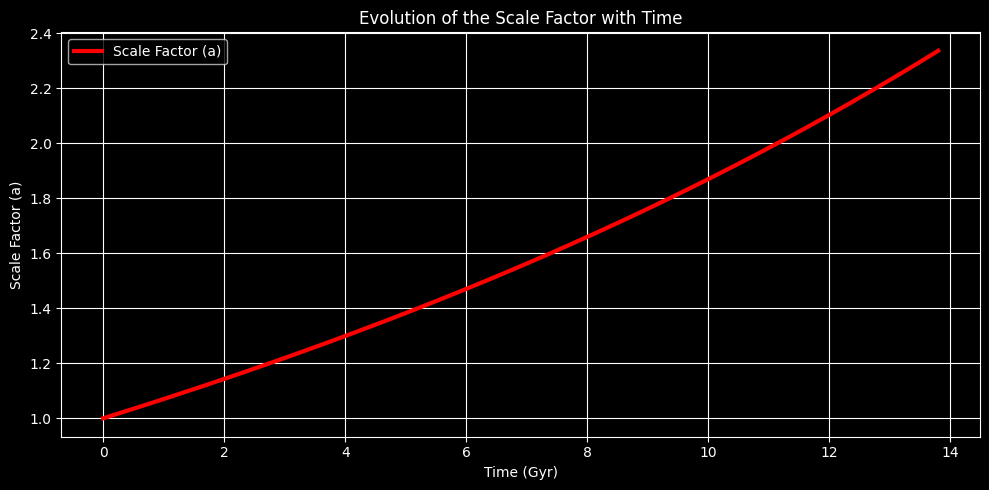

In [9]:
plt.figure(figsize=(10,5))
plt.title("Evolution of the Scale Factor with Time")
plt.plot(timeInterval,a,label="Scale Factor (a)",c="red",lw=3)
plt.xlabel("Time (Gyr)")
plt.ylabel("Scale Factor (a)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**As the graph moves to the right, representing the future, we see the scale factor increasing steadily. This suggests that the Universe will continue to expand indefinitely.**

In [10]:
Omega_M0Values = np.linspace(0.1,0.9,5) # Varied matter density parameter values
Omega_lambda0Values = np.linspace(0.1,0.9,5) # Varied dark energy density parameter values

In [11]:
timeInterval = np.linspace(0,13.8,100) # Time array from 0 to 13.8 billion years (age of the universe) in Gyr, same for all runs

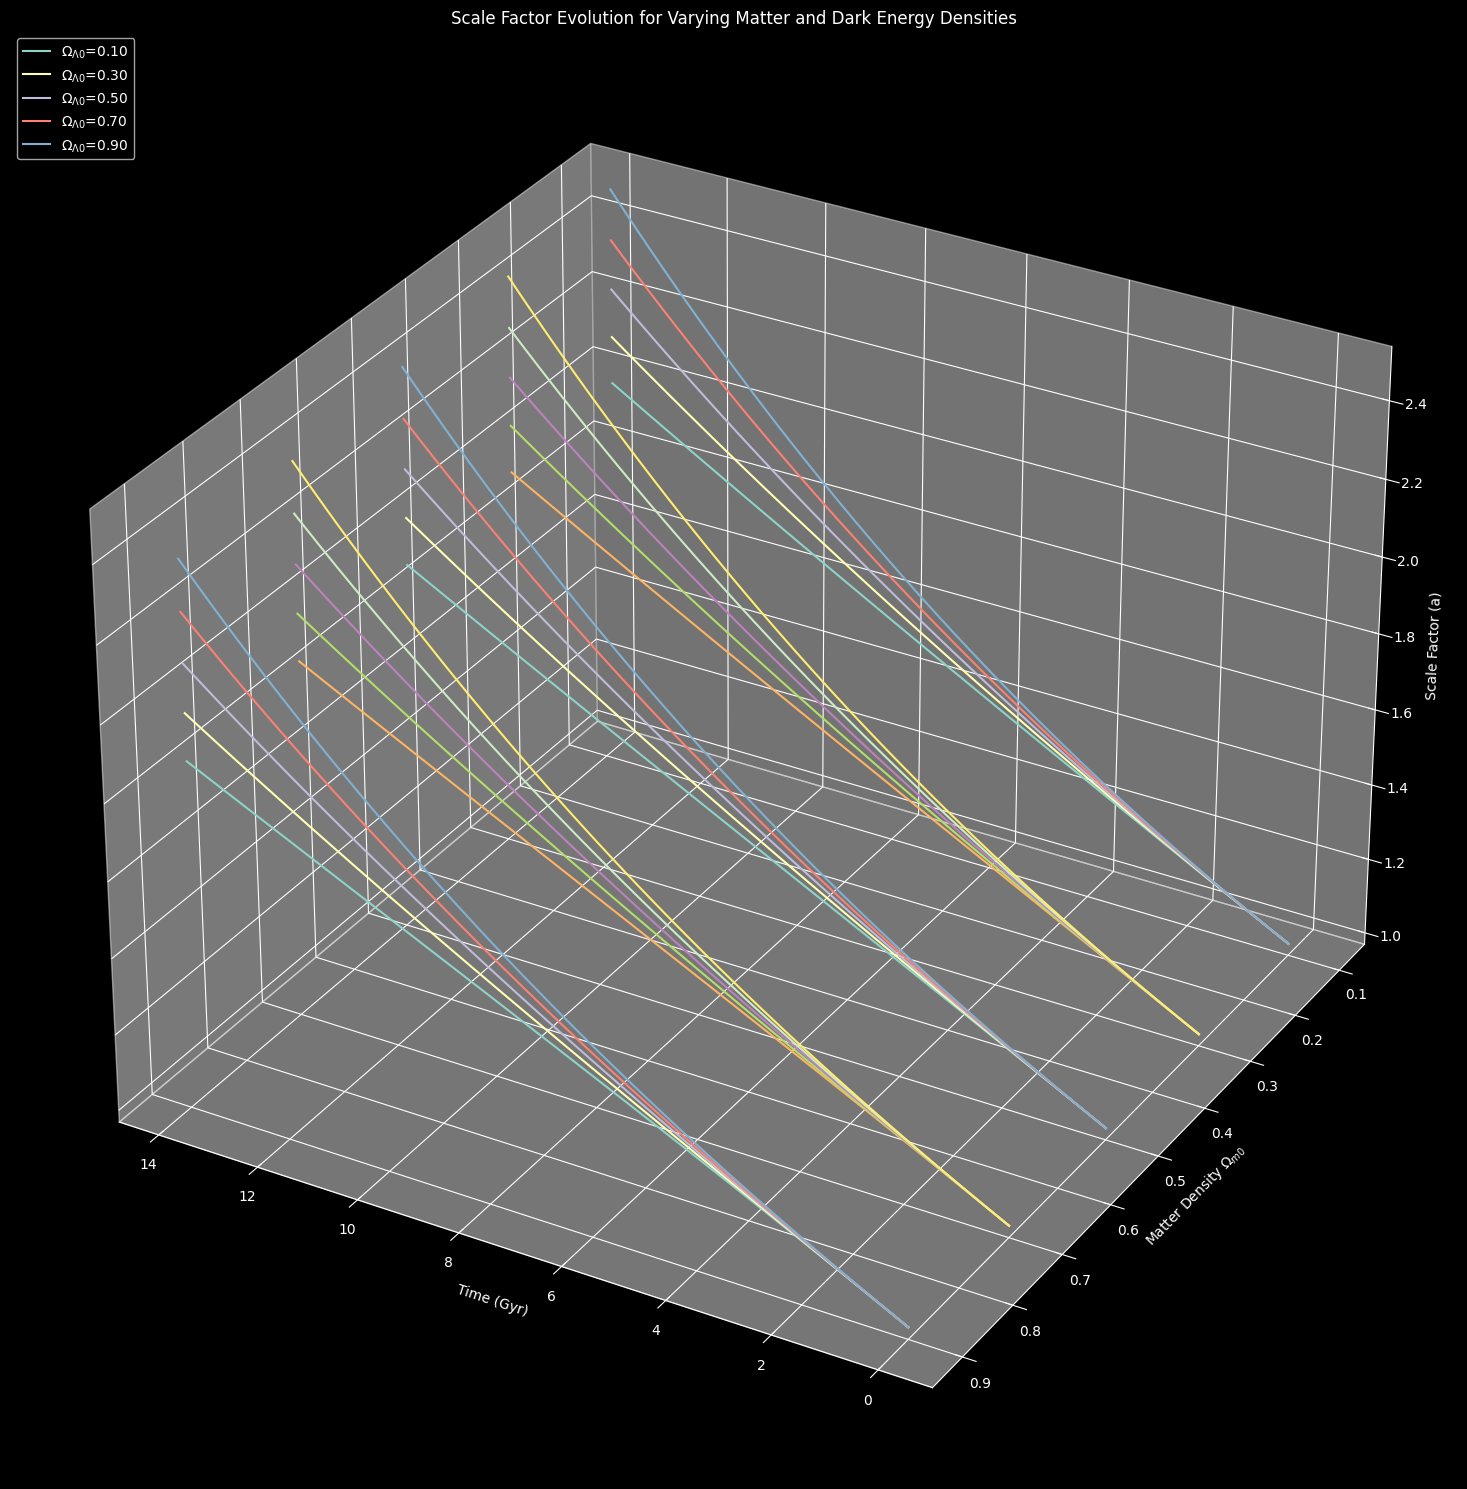

In [13]:
figure = plt.figure(figsize=(15,15))
ax = figure.add_subplot(111,projection="3d")
for OmegaM0 in Omega_M0Values:
  for Lambda0 in Omega_lambda0Values:
    Omega_k0 = 1.0-OmegaM0-Lambda0
    a = odeint(FriedmannEquation,a0,timeInterval,args=(H0,OmegaM0,Omega_r0,Lambda0,Omega_k0)).flatten()
    ax.plot(timeInterval,a,zs=OmegaM0,zdir="y")
ax.set_xlabel("Time (Gyr)")
ax.set_ylabel("Matter Density $\Omega_{m0}$")
ax.set_zlabel("Scale Factor (a)")
ax.view_init(elev=30,azim=120)
plt.title("Scale Factor Evolution for Varying Matter and Dark Energy Densities")
plt.legend(["$\Omega_{\Lambda0}$=%.2f" % x for x in Omega_lambda0Values],loc="upper left")
plt.tight_layout()
plt.show()

In [14]:
omegaLambdaValues = np.linspace(0.1,0.9,5) # Varied dark energy density parameter values
timeInterval = np.linspace(0,13.8,100) # Time array from 0 to 13.8 billion years (age of the universe) in Gyr, same for all runs
a0 = 1.0 # Initial condition (scale factor at t=0, which is today)

In [15]:
# Constants based on Planck spacescraft
H0 = 67.4 # Hubble constant at z = 0 in km/s/Mpc
H0 = H0*1.0220122e-3  # Convert Hubble constant to 1/Gyr units, H0 in 1/Gyr
Omega_m0 = 0.309 # Matter density parameter at z = 0
Omega_r0 = 0 # The radiation component is very small and is often neglected in late-time Universe calculations

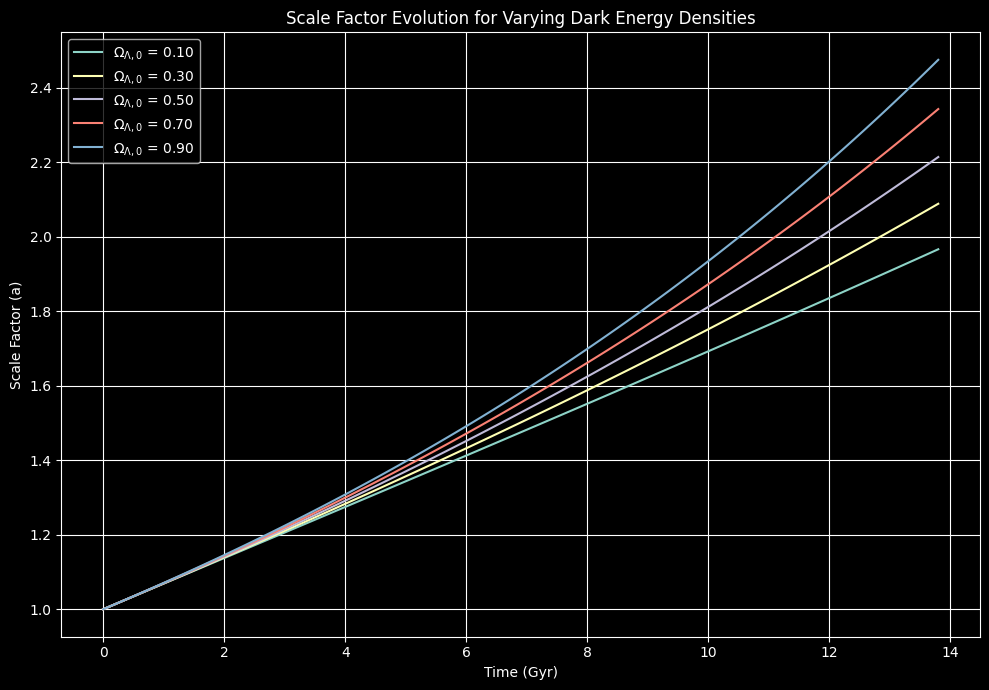

In [16]:
plt.figure(figsize=(10,7))
for omega in omegaLambdaValues:
  Omega_k0 = 1.0 - Omega_m0-omega
  a = odeint(FriedmannEquation,a0,timeInterval,args=(H0,Omega_m0,Omega_r0,omega,Omega_k0)).flatten()
  plt.plot(timeInterval,a,label=f"$\Omega_{{\Lambda,0}}$ = {omega:.2f}")
plt.xlabel("Time (Gyr)")
plt.ylabel("Scale Factor (a)")
plt.title("Scale Factor Evolution for Varying Dark Energy Densities")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [36]:
models = [
    {"Omega_m0":0.3,"Omega_lambda0":0.7,"style":"-","label":r"$\Omega_{m0} = 0.3, \Omega_{\Lambda0} = 0.7$"},
    {"Omega_m0":0.3,"Omega_lambda0":0.0,"style":"dashed","label":r"$\Omega_{m0} = 0.3, \Omega_{\Lambda0} = 0.0$"},
    {"Omega_m0":1.0,"Omega_lambda0":0.0,"style":"dashed","label":r"$\Omega_{m0} = 1.0, \Omega_{\Lambda0} = 0.0$"},
    {"Omega_m0":2.0,"Omega_lambda0":0.0,"style":"dashed","label":r"$\Omega_{m0} = 2.0, \Omega_{\Lambda0} = 0.0$"}
]

In [37]:
timeInterval = np.linspace(0,30,300) # Time array from 0 to 30 billion years in Gyr

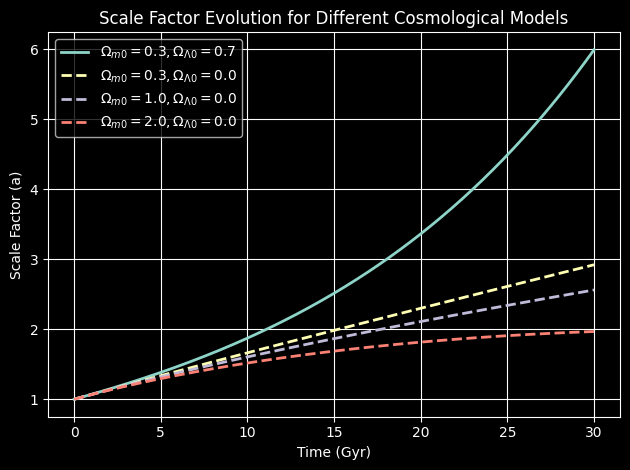

In [39]:
for model in models:
  Omega_k0 = 1.0 - model["Omega_m0"]-model["Omega_lambda0"]
  a = odeint(FriedmannEquation,a0,timeInterval,args=(H0,model["Omega_m0"],Omega_r0,model["Omega_lambda0"],Omega_k0))
  plt.plot(timeInterval,a,ls=model["style"],label=model["label"],lw=2)
plt.xlabel("Time (Gyr)")
plt.ylabel("Scale Factor (a)")
plt.title("Scale Factor Evolution for Different Cosmological Models")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Redshift

* Redshift refers to the phenomenon where light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum. In many cases, this is an indicator of how fast an object, such as a galaxy, is moving away from us.
* A positive redshift (z > 0) means that the object is moving away from the observer (the light is redshifted), while a negative redshift (z < 0), known as blueshift, means the object is moving towards the observer (the light is blueshifted).

Concepts:
  - z = 0: The object is not moving away from or towards the observer, or it is very close such that the expansion of the universe does not affect its observed light.
  - 0 < z < 1: The object is moving away from us, and the farther it is, the higher the redshift. This is typical for nearby galaxies.
  - z = 1: The universe has expanded to twice the size at the time of the emission of the light compared to the size of the universe when the light is received.
  - z > 1: These are typically very distant objects, and the universe has expanded by more than a factor of two since the emission of the light. High redshifts correspond to objects that are observed as they were in the very early universe.

In [40]:
c = 299792.458  # Speed of light in km/s
H0 = 67.4  # Hubble constant in km/s/Mpc
Omega_M = 0.309  # Matter density parameter
Omega_Lambda = 0.691  # Dark energy density parameter

In [42]:
# Function for H(z), Hubble parameter as a function of redshift
def HubbleFunction(redshift:int or float,constant:int or float,mass:int or float,darkEnergyDensity:int or float)->int or float:
  result = constant*np.sqrt(mass*(1+redshift)**3+darkEnergyDensity)
  return result

In [43]:
# Function to integrate to find the luminosity distance
def Integrand(redshift:int or float,h0:int or float,mass:int or float,darkEnergyDensity:int or float)->int or float:
  result = c/HubbleFunction(redshift,h0,mass,darkEnergyDensity)
  return result

In [45]:
def LuminosityDistance(redshift:int or float,h0:int or float,mass:int or float,darkEnergyDensity:int or float)->int or float:
  integral,_ = quad(Integrand,0,redshift,args=(h0,mass,darkEnergyDensity))
  result = (1+redshift)*integral
  return result

In [46]:
redshiftValue_1 = 1
redshiftValue_05 = 0.5
redshiftValue_0 = 0

In [47]:
luminosityDistance_1 = LuminosityDistance(redshiftValue_1,H0,Omega_M,Omega_Lambda)
luminosityDistance_05 = LuminosityDistance(redshiftValue_05,H0,Omega_M,Omega_Lambda)
luminosityDistance_0 = LuminosityDistance(redshiftValue_0,H0,Omega_M,Omega_Lambda)

In [48]:
print(f"Luminosity Distance: {luminosityDistance_1} Mpc with Redshift Value: {redshiftValue_1}")
print(f"Luminosity Distance: {luminosityDistance_05} Mpc with Redshift Value: {redshiftValue_05}")
print(f"Luminosity Distance: {luminosityDistance_0} Mpc with Redshift Value: {redshiftValue_0}")

Luminosity Distance: 6826.28757975536 Mpc with Redshift Value: 1
Luminosity Distance: 2933.098948113854 Mpc with Redshift Value: 0.5
Luminosity Distance: 0.0 Mpc with Redshift Value: 0


**Owing to the cosmological expansion, distant galaxies move away from us and appear red-shifted.**

# Observable Universe

* The observable universe refers to the part of the Universe that is accessible to our observation. Due to the finite speed of light and the age of the Universe, we can only see as far as light has had time to travel since the Big Bang. This creates a cosmic horizon beyond which we cannot observe.
* The radius of the observable universe is often called the Hubble radius or the Hubble sphere and can be roughly estimated by the distance light has traveled since the Big Bang. This distance is called the "particle horizon" and is given by:
> $d_p = c \int_{0}^{t_0} \frac{dt}{a(t)}$

where:

$c$: the speed of light

$t_0$: the current age of the Universe

$a(t)$: the scale factor of the Universe at time t

$d_p$: the particle horizon distance

**In a ΛCDM cosmological model, this integral can't be solved analytically because a(t) is governed by the Friedmann equations, which take into account the matter density, dark energy density, and radiation density of the Universe. To estimate the size of the observable universe in Python, we can numerically integrate 1/a(t) over the age of the Universe.**